# Digits Dataset Classification with apenet's Random Forest

This notebook demonstrates how to build, train, and evaluate a Random Forest model using the apenet library, using the Digits Dataset as an example.


## Import Libraries

In [2]:
import os
os.chdir('..')

import numpy as np

# Data Loading
from sklearn.datasets import load_digits

# Data Visualization
import matplotlib.pyplot as plt


# Import our library
from apenet.rf.tree import DecisionTreeClassifier
from apenet.rf.forest import RandomForestClassifier
from apenet.utils.data import train_test_split
from apenet.utils.metrics import accuracy
from apenet.eye.data import plot_confusion_matrix

## Set Random Generator

In [3]:
rng = np.random.default_rng()

## Load Data

In [4]:
digits = load_digits()
X = digits.data
y = digits.target
feature_names = digits.feature_names
class_names = digits.target_names

## Preprocess Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, rng=rng)

## Train models

In [6]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(n_trees=10, max_depth=10, rng=rng)
rf.fit(X_train, y_train)

## Predict and Evaluate

In [7]:
# Make predictions
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)

# Print accuracy
print(f"Decision Tree Accuracy: {accuracy(y_test, dt_preds):.4f}")
print(f"Random Forest Accuracy: {accuracy(y_test, rf_preds):.4f}")

Decision Tree Accuracy: 0.6704
Random Forest Accuracy: 0.9265


# Data Visualization

## Plot confusion matrix

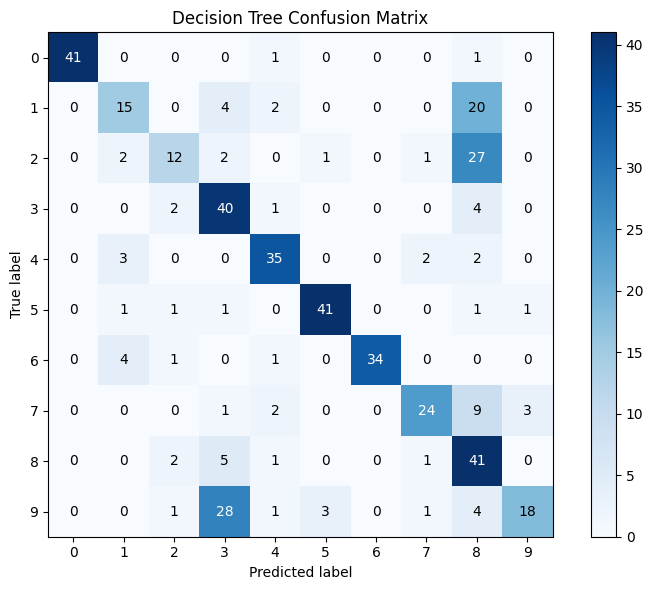

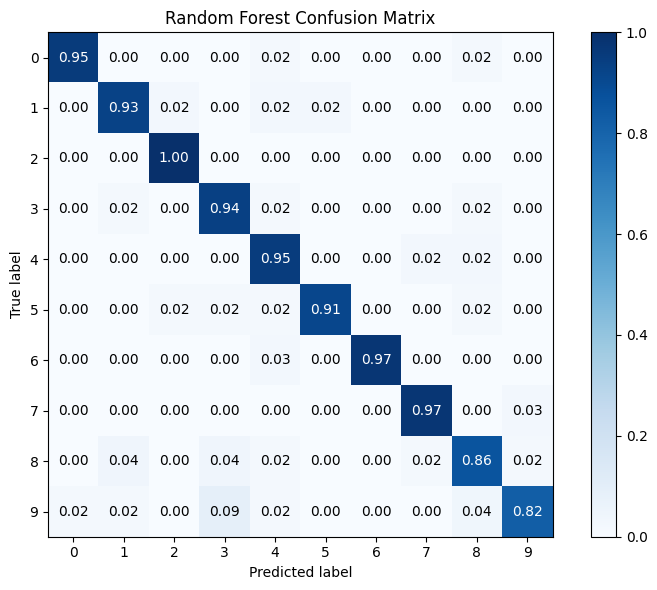

In [8]:
cm_fig1 = plot_confusion_matrix(
    y_test,
    dt_preds,
    class_names=class_names,
    title="Decision Tree Confusion Matrix"
)
cm_fig2 = plot_confusion_matrix(
    y_test,
    rf_preds,
    class_names=class_names,
    title="Random Forest Confusion Matrix",
    normalize=True
)
plt.show()